In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv("garmin_run_data.csv")

# Quick preview
df.head()



,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Best Lap Time,Number of Laps
0,Running,7/15/20 9:41,Cherry Hill Running,6.00,530,0:43:55,141,160,176,182,7:19,6:20,169,173,1.26,00:02.3,7
1,Running,7/14/20 17:45,Cherry Hill Running,6.50,587,0:47:04,144,160,172,182,7:14,6:35,183,187,1.29,03:32.7,7
2,Running,7/13/20 18:57,Cherry Hill Running,5.01,392,0:40:29,128,151,170,180,8:05,5:49,124,124,1.17,00:04.1,6
3,Running,7/12/20 18:44,Cherry Hill Running,7.01,633,0:52:55,142,157,172,180,7:33,5:00,215,219,1.24,00:05.1,8
4,Running,7/11/20 19:35,Cherry Hill Running,5.19,419,0:41:35,129,143,170,178,8:01,6:48,76,80,1.18,01:27.1,6


In [9]:
df = df.drop(columns=[
    'Title', 'Number of Laps', 'Best Lap Time', 'Elev Loss'
])

print(df.isnull().sum())


Activity Type        0
Date                 0
Distance             0
Calories             0
Time                 0
Avg HR               0
Max HR               0
Avg Run Cadence      0
Max Run Cadence      0
Avg Pace             0
Best Pace            0
Elev Gain            0
Avg Stride Length    0
dtype: int64


In [10]:
df = df.dropna()


In [17]:
print(df['Time'].unique())


['0:43:55' '0:47:04' '0:40:29' '0:52:55' '0:41:35' '0:45:48' '0:35:11'
 '0:35:29' '0:42:31' '0:25:04' '0:44:49' '0:35:12' '0:32:16' '0:39:49'
 '0:52:45' '0:44:06' '0:49:03' '0:39:06' '0:50:05' '0:47:07' '0:37:47'
 '0:41:23' '0:34:04' '0:39:47' '0:50:04' '0:42:33' '0:33:39' '1:02:25'
 '0:39:45' '0:50:54' '0:40:37' '0:32:08' '1:01:19' '0:38:25' '0:38:15'
 '0:38:52' '0:44:23' '0:42:05' '0:29:02' '0:48:04' '0:48:03' '0:36:25'
 '0:42:22' '0:43:20' '0:29:06' '0:25:37' '0:40:47' '0:45:27' '0:44:03'
 '0:23:55' '0:20:56' '0:47:36' '0:37:45' '0:45:50' '0:30:22' '0:24:32'
 '0:36:45' '0:37:57' '0:39:23' '0:40:40' '0:37:39' '0:36:32' '0:52:52'
 '0:31:25' '0:44:42' '0:24:30' '0:22:16' '0:30:44' '0:22:59' '0:36:46'
 '0:46:31' '0:23:14' '0:25:19' '0:31:37' '0:33:54' '0:42:58' '0:28:10'
 '0:32:46' '0:29:25' '0:22:18' '0:36:24' '0:15:41' '0:23:49' '0:23:24'
 '0:15:45' '0:26:33' '09:18.1' '0:29:14' '0:22:06' '0:21:53' '0:43:26'
 '0:39:57' '0:24:12' '0:36:54' '0:28:24' '0:23:00' '0:17:04' '0:28:50'
 '0:17

In [18]:
# Keep rows where 'Time' has the correct format (contains at least one colon and no periods)
df = df[df['Time'].str.contains(":", na=False)]
df = df[~df['Time'].str.contains("\.", na=False)]  # Remove entries like "." if they still exist


In [19]:
df['Time'] = pd.to_timedelta(df['Time']).dt.total_seconds() / 60


In [20]:
df.to_csv("cleaned_running_data.csv", index=False)


In [21]:
df.describe()


,Distance,Time,Avg Stride Length
count,570.000000,570.000000,570.000000
mean,6.077000,42.989298,1.227561
std,3.720877,25.632342,0.297052
min,0.800000,4.166667,0.000000
25%,3.022500,21.925000,1.230000
50%,5.005000,36.800000,1.280000
75%,8.990000,61.550000,1.320000
max,18.010000,120.000000,1.750000


In [23]:
print(df.columns)


Index(['Activity Type', 'Date', 'Distance', 'Calories', 'Time', 'Avg HR',
       'Max HR', 'Avg Run Cadence', 'Max Run Cadence', 'Avg Pace', 'Best Pace',
       'Elev Gain', 'Avg Stride Length'],
      dtype='object')


In [24]:
df.rename(columns={'Avg HR': 'Avg_HR'}, inplace=True)



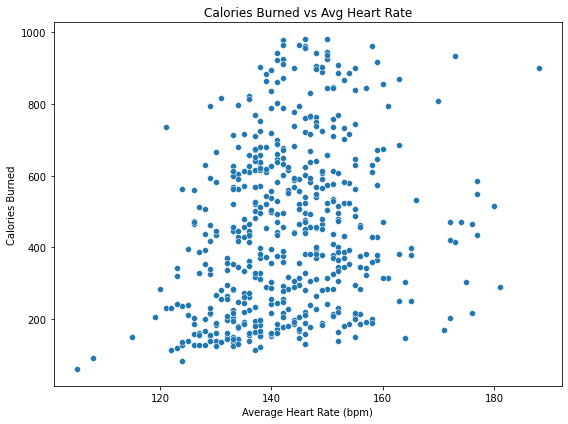

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Force numeric conversion (in case plot still sees strings)
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')
df = df[df['Calories'].notnull()]

# Plot
plt.figure(figsize=(8, 6))  # Add size to help spacing
sns.scatterplot(data=df, x='Avg_HR', y='Calories')
plt.title("Calories Burned vs Avg Heart Rate")
plt.xlabel("Average Heart Rate (bpm)")
plt.ylabel("Calories Burned")
plt.tight_layout()  # Fix spacing of labels
plt.show()



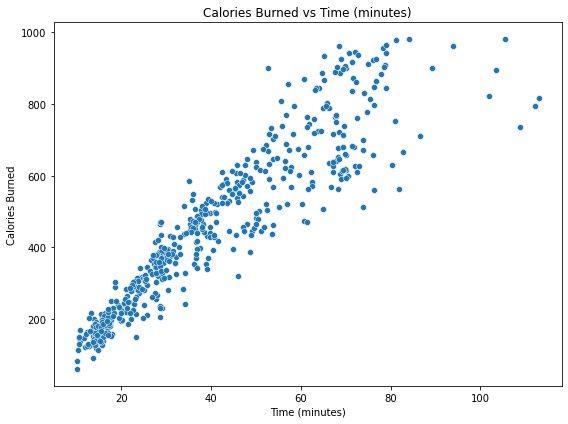

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Calories is numeric again (safe to re-run)
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')
df = df[df['Calories'].notnull()]

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Time', y='Calories')
plt.title("Calories Burned vs Time (minutes)")
plt.xlabel("Time (minutes)")
plt.ylabel("Calories Burned")
plt.tight_layout()
plt.show()



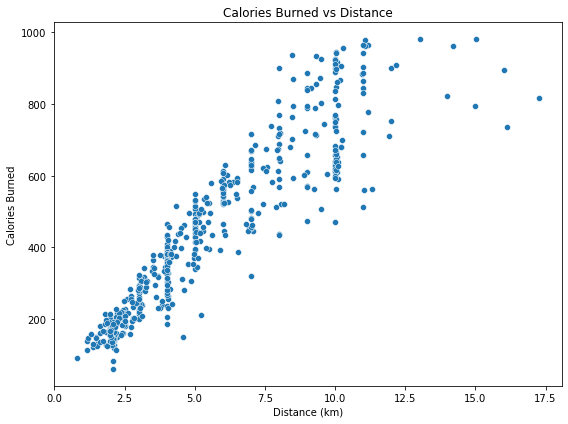

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Calories is numeric
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')
df = df[df['Calories'].notnull()]

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Distance', y='Calories')
plt.title("Calories Burned vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Calories Burned")
plt.tight_layout()
plt.show()


In [29]:
# Search for any rows with "__--" in the dataset
df[df.astype(str).apply(lambda x: x.str.contains('__--')).any(axis=1)]


,Activity Type,Date,Distance,Calories,Time,Avg_HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Avg Stride Length


In [30]:
df = df[~df.astype(str).apply(lambda x: x.str.contains('__--')).any(axis=1)]


In [31]:
print(df.dtypes)
print(df[['Time', 'Avg_HR', 'Distance']].applymap(type).head())


Activity Type         object
Date                  object
Distance             float64
Calories              object
Time                 float64
Avg_HR                object
Max HR                object
Avg Run Cadence       object
Max Run Cadence       object
Avg Pace              object
Best Pace             object
Elev Gain             object
Avg Stride Length    float64
dtype: object
              Time         Avg_HR         Distance
0  <class 'float'>  <class 'str'>  <class 'float'>
1  <class 'float'>  <class 'str'>  <class 'float'>
2  <class 'float'>  <class 'str'>  <class 'float'>
3  <class 'float'>  <class 'str'>  <class 'float'>
4  <class 'float'>  <class 'str'>  <class 'float'>


In [34]:
# Keep only rows where Avg_HR can be converted to float
df = df[pd.to_numeric(df['Avg_HR'], errors='coerce').notnull()]



In [35]:
df['Avg_HR'] = df['Avg_HR'].astype(float)


In [36]:
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')
df = df[df['Calories'].notnull()]  # Drop NaN after conversion


In [37]:
X = df[['Time', 'Avg_HR', 'Distance']]
y = df['Calories']


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Linear Regression R² Score: {r2:.2f}")


Linear Regression R² Score: 0.91


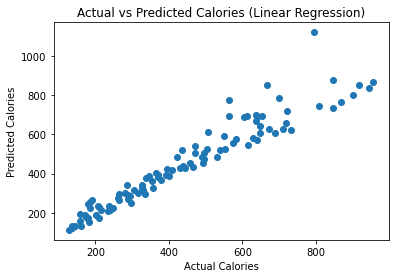

In [39]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories (Linear Regression)")
plt.show()
